In [1]:
import unittest

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots

df = pd.read_csv('Data/drug_sales.csv')

df['date'] = pd.to_datetime(df['date'])

In [2]:
test = df[85:]
train = df[:85]

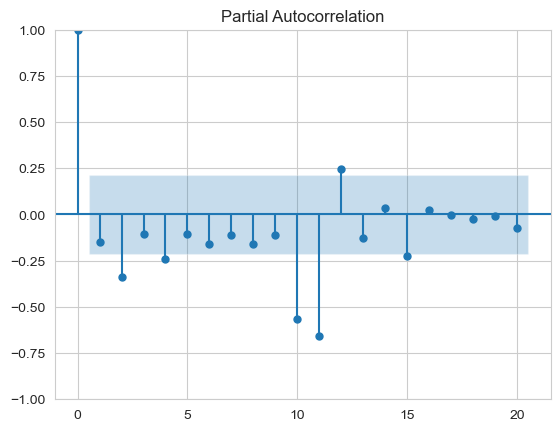

In [3]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_pacf(train.diff().dropna().value)
plt.show()

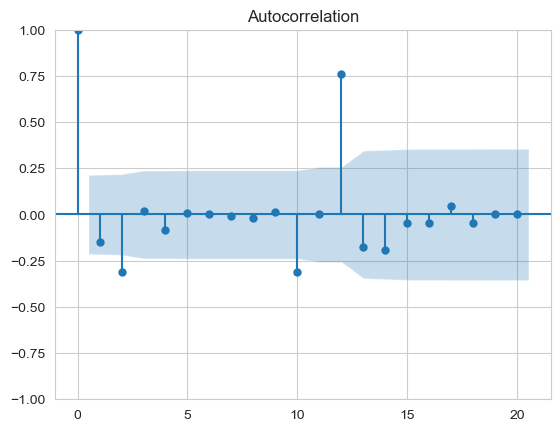

In [4]:
plot_acf(train.diff().dropna().value)
plt.show()

In [5]:
result = adfuller(train.value)
print(f'd value = {result[1]}')

d value = 0.9518438953474885


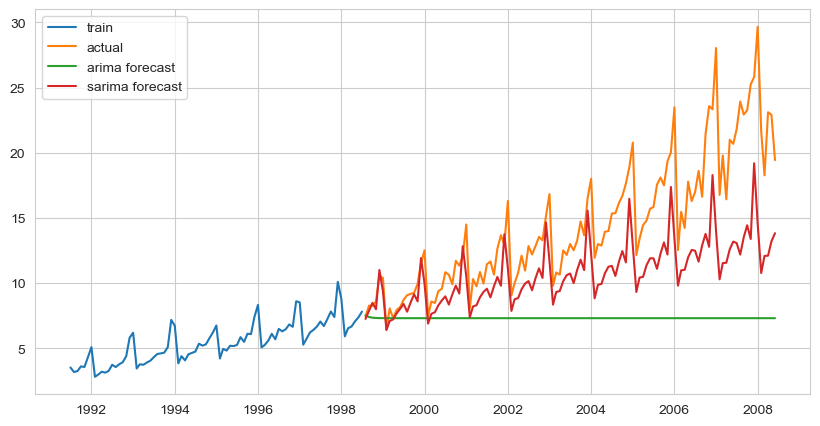

In [7]:
arima = ARIMA(train.value, order=(1, 1, 1))
arima_model_fit = arima.fit()

sarima = ARIMA(train.value, seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima.fit()

plt.subplots(figsize=(10, 5))

date_range = pd.date_range(start=train.date.max(), periods=120, freq='MS')

plt.plot(train['date'], train.value, label='train')
plt.plot(test['date'], test.value, label='actual')
plt.plot(test['date'], arima_model_fit.forecast(steps=len(test)), label='arima forecast')
plt.plot(test['date'], sarima_model_fit.forecast(steps=len(test)), label='sarima forecast')

plt.legend()
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA 